# Computer Vision and Convolutional Neural Networks with TensorFlow

In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile, pathlib, random, os

from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Get the data

We're using the data from Food 101 on Kaggle.com

https://www.kaggle.com/datasets/dansbecker/food-101?resource=download

It is already pre-processed by Daniel Bourke in [this repo](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb) and the pre-processed images are stored in the Google storage URL below. The modification is made to only use two classes (pizza and steak).

In [28]:
# import urllib.request

# url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'
# file_name = 'pizza_steak.zip'
# file = urllib.request.urlretrieve(url, file_name)

# zip_ref = zipfile.ZipFile("./pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

## Analyse the data

In [29]:
food_class_dir = "C:\\Users\\Joakim Torsvik\\Python_Notebooks\\train_test_data\\TensorFlow_Developer_data\\pizza_steak\\"
for dirpath, dirnames, filenames in os.walk(food_class_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath.replace(food_class_dir, 'pizza_steak')}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steaktest'.
There are 0 directories and 250 images in 'pizza_steaktest\pizza'.
There are 0 directories and 250 images in 'pizza_steaktest\steak'.
There are 2 directories and 0 images in 'pizza_steaktrain'.
There are 0 directories and 750 images in 'pizza_steaktrain\pizza'.
There are 0 directories and 750 images in 'pizza_steaktrain\steak'.


In [30]:
num_steak_images_train = len(os.listdir(food_class_dir + 'train\\steak'))

num_steak_images_train

750

In [31]:
data_dir = pathlib.Path(food_class_dir + 'train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [32]:
def view_random_image(target_dir, target_class):

    # Set up the target directory
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it
    img = mpimg.imread(target_folder + "\\" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');

    print(f"Image Shape: {img.shape}")
    return img

['3023774.jpg']
Image Shape: (512, 512, 3)


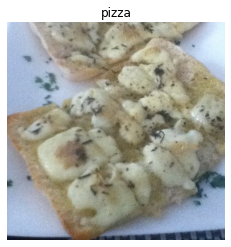

In [33]:
img = view_random_image(target_dir= food_class_dir + 'train\\',
                        target_class='pizza')

In [34]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[215, 235, 255],
        [210, 230, 254],
        [206, 226, 250],
        ...,
        [223, 248, 255],
        [222, 247, 254],
        [222, 247, 254]],

       [[210, 230, 254],
        [213, 233, 255],
        [213, 233, 255],
        ...,
        [221, 246, 253],
        [221, 246, 253],
        [221, 246, 253]],

       [[213, 233, 255],
        [211, 231, 255],
        [207, 227, 251],
        ...,
        [220, 245, 252],
        [220, 245, 252],
        [220, 245, 252]],

       ...,

       [[ 14,  19,  38],
        [ 20,  25,  44],
        [ 13,  18,  37],
        ...,
        [ 36,  51,  74],
        [ 41,  56,  79],
        [ 39,  54,  77]],

       [[ 15,  18,  35],
        [ 21,  24,  41],
        [ 15,  18,  35],
        ...,
        [ 34,  49,  72],
        [ 36,  51,  74],
        [ 35,  50,  73]],

       [[ 13,  16,  33],
        [ 17,  20,  37],
        [ 11,  14,  31],
        ...,
        [ 31,  46,  6

In [35]:
# Set the seed
tf.random.set_seed(42)


# Preprocess the data to be between 0 and 1
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

# Folder path of the data
train_dir = food_class_dir + 'train'
test_dir = food_class_dir + 'test'

# Import the data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            batch_size=32,
                                            target_size=(224, 224),
                                            class_mode='binary',
                                            seed=42)

# Do the same with test data
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model same as the Tiny VGG
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')])

# Compile the CNN
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
 1/47 [..............................] - ETA: 45s - loss: 0.6966 - accuracy: 0.4062

47/47 [==============================] - 31s 649ms/step - loss: 0.5374 - accuracy: 0.7400 - val_loss: 0.4113 - val_accuracy: 0.8120
Epoch 2/10
47/47 [==============================] - 31s 655ms/step - loss: 0.4198 - accuracy: 0.8260 - val_loss: 0.3646 - val_accuracy: 0.8540
Epoch 3/10
47/47 [==============================] - 31s 652ms/step - loss: 0.3898 - accuracy: 0.8360 - val_loss: 0.2977 - val_accuracy: 0.8880
Epoch 4/10
47/47 [==============================] - 28s 593ms/step - loss: 0.3518 - accuracy: 0.8493 - val_loss: 0.2906 - val_accuracy: 0.8940
Epoch 5/10
47/47 [==============================] - 27s 580ms/step - loss: 0.3195 - accuracy: 0.8733 - val_loss: 0.3120 - val_accuracy: 0.8700
Epoch 6/10
47/47 [==============================] - 27s 576ms/step - loss: 0.2938 - accuracy: 0.8833 - val_loss: 0.2991 - val_accuracy: 0.8860
Epoch 7/10
47/47 [==============================] - 27s 580ms/step - loss: 0.2546 - accuracy: 0.8980 - val_loss: 0.3100 - val_accuracy: 0.8640
Epoch 8/10

<AxesSubplot:>

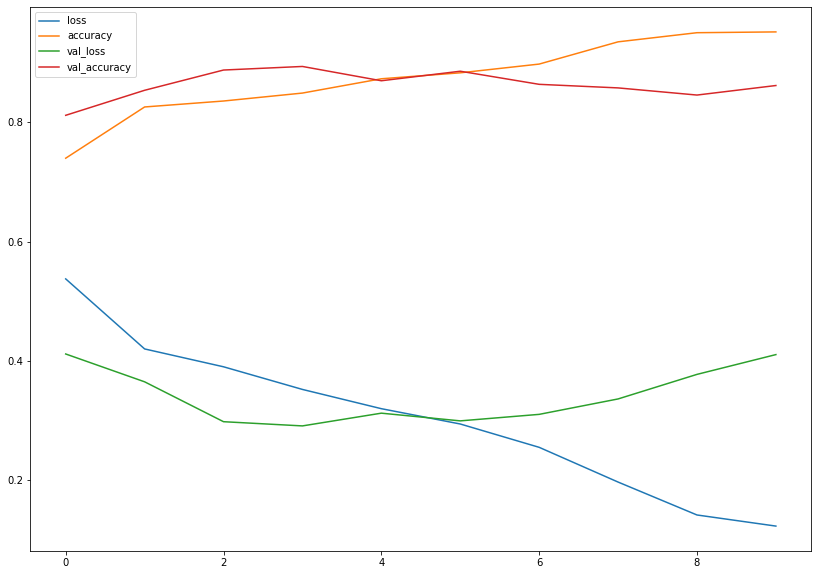

In [36]:
pd.DataFrame(history_1.history).plot(figsize=(14, 10))

In [37]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

### Creating a non-CNN model to process the images

In [38]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(40, activation='tanh'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 7s 145ms/step - loss: 0.6101 - accuracy: 0.7120 - val_loss: 0.5679 - val_accuracy: 0.7220
Epoch 2/10
47/47 [==============================] - 6s 138ms/step - loss: 0.5590 - accuracy: 0.7307 - val_loss: 0.5361 - val_accuracy: 0.7600
Epoch 3/10
47/47 [==============================] - 7s 140ms/step - loss: 0.5325 - accuracy: 0.7620 - val_loss: 0.5137 - val_accuracy: 0.7600
Epoch 4/10
47/47 [==============================] - 6s 137ms/step - loss: 0.5305 - accuracy: 0.7673 - val_loss: 0.5482 - val_accuracy: 0.7560
Epoch 5/10
47/47 [==============================] - 6s 138ms/step - loss: 0.5415 - accuracy: 0.7553 - val_loss: 0.5845 - val_accuracy: 0.6960
Epoch 6/10
47/47 [==============================] - 6s 136ms/step - loss: 0.5671 - accuracy: 0.7440 - val_loss: 0.5500 - val_accuracy: 0.7600
Epoch 7/10
47/47 [==============================] - 6s 138ms/step - loss: 0.5436 - accuracy: 0.7740 - val_loss: 0.5486 - val_accuracy: 0.7480
Epoch 

<AxesSubplot:>

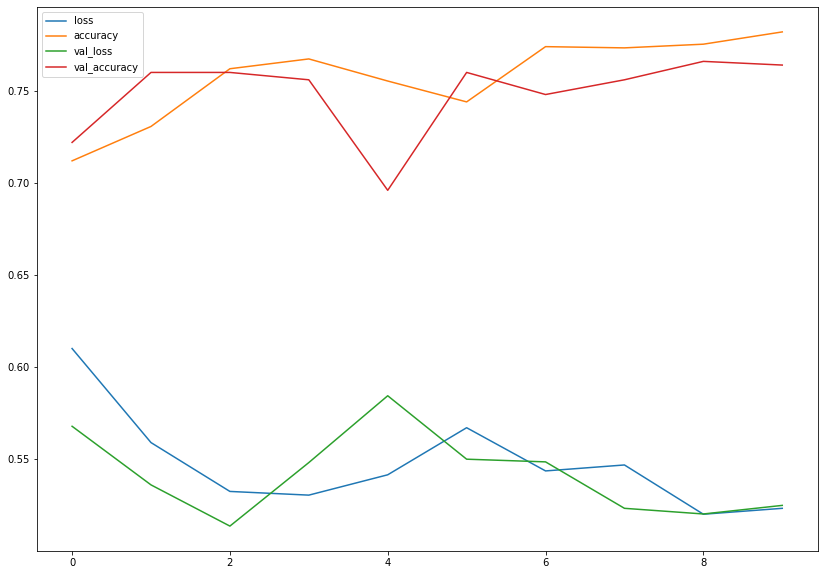

In [39]:
pd.DataFrame(history_2.history).plot(figsize=(14, 10))

In [40]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 40)                6021160   
                                                                 
 dense_3 (Dense)             (None, 40)                1640      
                                                                 
 dense_4 (Dense)             (None, 1)                 41        
                                                                 
Total params: 6,022,841
Trainable params: 6,022,841
Non-trainable params: 0
_________________________________________________________________


In [41]:
6022841/31101

193.65425549017718

## Breaking Down the CNN-Model

Next step is to turn the set of images into **batches**

A batch is a small subset of data. Rather than look at all 10.000 images all at once, a model may only look at 32 images at a time. 
It does this for many reasons:
1. The data memory on the CPU/GPU may not be big enough to handle all of the images at once.
2. Trying to learn the patterns in 10.000 images in one go be "information overflow" for the machine learning model, and thus the model won't learn very well.

    > *"Training with more than minibatch size of 32 is not good for learning"*\
    Yann LeCun
    
    https://arxiv.org/abs/1804.07612

In [42]:
# Create train and test data generators and rescale the data

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [43]:
# Load in the image data from the directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = train_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224, 224),
                                              class_mode='binary',
                                              batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [44]:
# Get a sample of train data batch
images, labels = train_data.next() # Get the "next" batch of images/labels in the training data

len(images), len(labels)

(32, 32)

In [45]:
# How many batches are there?
len(train_data)

47

In [46]:
# This is because 1500 images divided by batch-sizes of 32 is
round(1500/32)

47

In [47]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.8745099 , 0.86666673, 0.8196079 ],
          [0.8745099 , 0.86666673, 0.8196079 ],
          [0.8745099 , 0.86666673, 0.8196079 ],
          ...,
          [0.882353  , 0.86666673, 0.8235295 ],
          [0.87843144, 0.86274517, 0.8196079 ],
          [0.89019614, 0.8745099 , 0.8313726 ]],
 
         [[0.882353  , 0.8745099 , 0.82745105],
          [0.8745099 , 0.86666673, 0.8196079 ],
          [0.8705883 , 0.86274517, 0.81568635],
          ...,
          [0.882353  , 0.86666673, 0.8235295 ],
          [0.8705883 , 0.854902  , 0.8117648 ],
          [0.86666673, 0.85098046, 0.8078432 ]],
 
         [[0.8745099 , 0.86666673, 0.8196079 ],
          [0.882353  , 0.8745099 , 0.82745105],
          [0.8745099 , 0.86666673, 0.8196079 ],
          ...,
          [0.89019614, 0.882353  , 0.8313726 ],
          [0.87843144, 0.8705883 , 0.8196079 ],
          [0.8862746 , 0.87843144, 0.82745105]],
 
         ...,
 
         [[0.86666673, 0.86666673, 0.8196079 ],
          [0.88235

Since the image is `rgb`, column 1 of each row is `Red`, column 2 is `Green` and column 3 is `Blue`

In [48]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.optimizers import Adam

## Different Layers in the CNN

### Hyper-parameters of the Convolutional 2D layer

- **Filters:** The number of filters to be applied in the layer. A *filter* is a term for all the weights in a *kernel* that will distort/augment the input tensor (e.g. image). Filters are used to detect features in the images. The more filters that are applied, the more features can be detected. The output of a filter is called a *Feature Map*.

If we use too many filters, memory space will become a problem and the model won't run. Even if it would run, overfitting could become an issue.

- **Kernel Size:** Kernel Size is the number of kernels (weights) to be applied in the kernel. A kernel size of 2 means that the kernel will be in  shape 2x2, kernel size of 3 means kernel shape 3x3 etc.

I.e., kernel size (k) = kernel shape (k x k)

- **Stride:** The stride states how many steps (strides) the kernel will takes between each transformation of the tensor. A stride of 1 means that the kernel will not *jump* when it moves across the image and thus each pixel will be processed by all the different weights in the kernel. If the kernel size is 3 and the stride is also 3, then the pixels to be convoluted will only be processed once. The stride determines the output shape of the feature map. If an activation map (input tensor) has shape 24x24, and the stride is 1, then the output will be 22x22 (if padding is not applied). Increasing the stride will reduce the output shape.

- **Padding:** Padding means adding numbers around the matrix, sort of like a frame. Most commonly, the padding contains zero-values. In principle this means that in an image of 24x24 pixels, padding increases the shape to 26x26 which gives the kernel the ability to move beyond the activation map. Applying padding when the stride is 1 keeps the shape of the output feature map the same as the input image.

### The Flatten Layer

This layer converts the tensor into a one-dimensional vector to fit the input of a fully-connected layer for classification. E.g. a 24x24x3 tensor would be converted into a 1728x1 vector (24 x 24 x 3 = 1728). In classification, this process is done after all of the data has finished convoluting.

### The Dense Layer

This layer is exactly similar to the output layer in a normal neural network. In binary classification, the shape is 1, with a sigmoid activation function, whereas with multi-class classification the shape is the same number as the predicted classes and a softmax activation function.

In [49]:
tf.__version__

'2.8.0'

In [50]:
model_3 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


history_3 = model_3.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10


47/47 [==============================] - 35s 733ms/step - loss: 1.3785 - accuracy: 0.6193 - val_loss: 0.4758 - val_accuracy: 0.7760
Epoch 2/10
47/47 [==============================] - 34s 721ms/step - loss: 0.4477 - accuracy: 0.8067 - val_loss: 0.4259 - val_accuracy: 0.8440
Epoch 3/10
47/47 [==============================] - 34s 712ms/step - loss: 0.3580 - accuracy: 0.8553 - val_loss: 0.4169 - val_accuracy: 0.7960
Epoch 4/10
47/47 [==============================] - 37s 780ms/step - loss: 0.1879 - accuracy: 0.9420 - val_loss: 0.4106 - val_accuracy: 0.8240
Epoch 5/10
47/47 [==============================] - 34s 711ms/step - loss: 0.0756 - accuracy: 0.9813 - val_loss: 0.4382 - val_accuracy: 0.8160
Epoch 6/10
47/47 [==============================] - 34s 713ms/step - loss: 0.0274 - accuracy: 0.9953 - val_loss: 0.6780 - val_accuracy: 0.7760
Epoch 7/10
47/47 [==============================] - 34s 721ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.5845 - val_accuracy: 0.8100
Epoch 8/10

<AxesSubplot:>

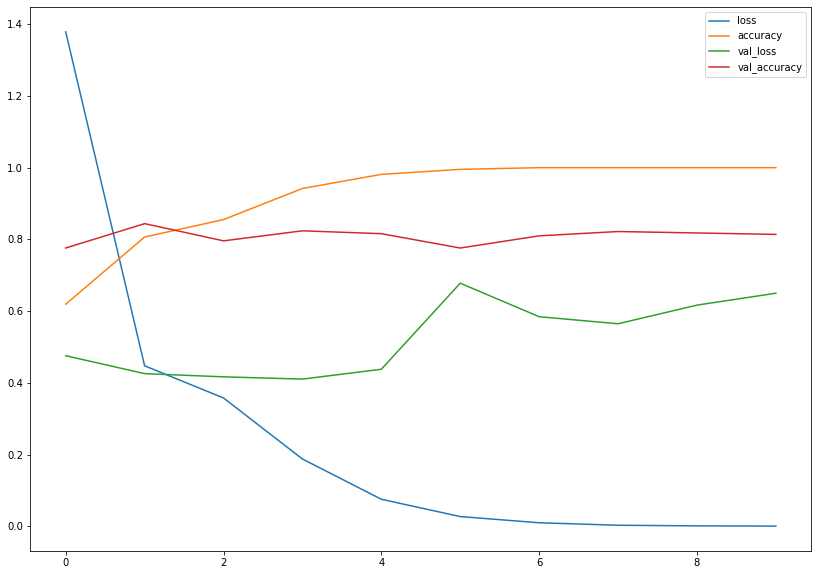

In [51]:
pd.DataFrame(history_3.history).plot(figsize=(14,10))

### Pooling Layers

A pooling layer is a layer which reduces the shape of the tensor for further processing, which reduces the number of parameters and overall computation of the network.

Max-Pooling operations reduces the image in the same way as a convolution transform pixels, but by selecting the maximum value in the kernel for each stride in the convolution. The Max-Pooling operation requires selection of kernel size and stride.

#### Adjust the model parameters

Fitting a ML-model comes in 3 steps:

1. Create a baseline model
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Ways to induce overfitting:

* Increase the number of convolutional layers and/or filters
* Add another dense layer to the output of the flattened layer

Reduce overfitting:
* Add Data Augmentation
* Add regularization layers (such as pooling layers)
* Add more data

In [52]:
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_5.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

history_5 = model_5.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 13s 278ms/step - loss: 0.6039 - accuracy: 0.6773 - val_loss: 0.4352 - val_accuracy: 0.8100
Epoch 2/10
47/47 [==============================] - 13s 270ms/step - loss: 0.4290 - accuracy: 0.8173 - val_loss: 0.3578 - val_accuracy: 0.8360
Epoch 3/10
47/47 [==============================] - 14s 297ms/step - loss: 0.3973 - accuracy: 0.8267 - val_loss: 0.3375 - val_accuracy: 0.8620
Epoch 4/10
47/47 [==============================] - 14s 287ms/step - loss: 0.3753 - accuracy: 0.8433 - val_loss: 0.3241 - val_accuracy: 0.8760
Epoch 5/10
47/47 [==============================] - 14s 299ms/step - loss: 0.3475 - accuracy: 0.8633 - val_loss: 0.3030 - val_accuracy: 0.8720
Epoch 6/10
47/47 [==============================] - 13s 273ms/step - loss: 0.3160 - accuracy: 0.8640 - val_loss: 0.3194 - val_accuracy: 0.8700
Epoch 7/10
47/47 [==============================] - 13s 275ms/step - loss: 0.3005 - accuracy: 0.8860 - val_loss: 0.2950 - val_accuracy: 0.8660

<AxesSubplot:>

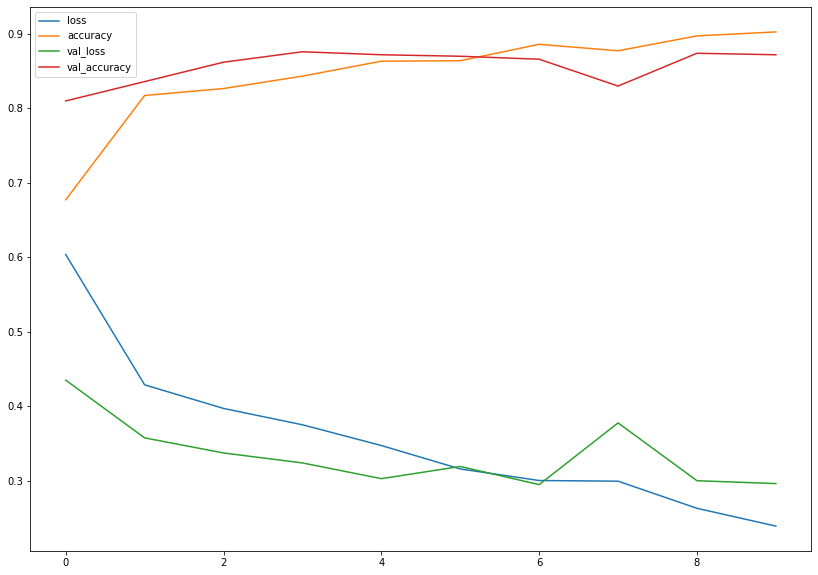

In [53]:
pd.DataFrame(history_5.history).plot(figsize=(14,10))

### Data Augmentation

** What is data augmentation? **

Data augmentation is the process of altering the training data by flipping-, rotating-, cropping/reshaping the image in order for the model to generalize patterns  more successfully.

* **rescale** - Rescaling the pixel values to fit within a different range of values (most commonly in a range between 0 and 1)
* **rotation_range** - Rotating the image in x number of degrees. This helps generalize the angles of the image so that the model can identify objects from different angles.
* **shear_range** - Angles the image slightly to a side so that the image looks like it is leaning. In practice it drags the top of the image to one side whilst the bottom of the image stands still.
* **zoom_range** - Crops the image by zooming into it.
* **width_shift_range** - Crops the image by shifting it left or right.
* **height_shift_range** - Crops the image by shifting it up or down.
* **horizontal_flip** - Flips the image so that it is mirrored.

Many more augmentation functions can be applied to the ImageDataGenerator function. They can be found in [this article](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

In [54]:
# Create ImageDataGenerator training instances with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset (test data should never be augmented)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [55]:
#  Import the data and augment it from the training directory
print('Augmented training data:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

# Create non-augmented training data
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print('Non-augmented test data:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training data:


Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [56]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number:  23


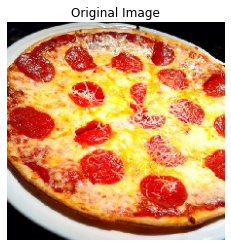

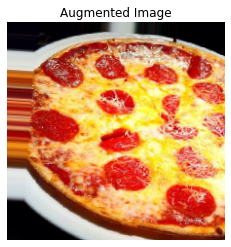

In [57]:
# Show the original image and the augmented image
random_nr = random.randint(0, 32)
print("showing image number: ", random_nr)
plt.imshow(images[random_nr])
plt.title('Original Image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_nr])
plt.title('Augmented Image')
plt.axis(False);

In [58]:
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_6.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['Accuracy']
)

history_6 = model_6.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 23s 476ms/step - loss: 0.6981 - Accuracy: 0.4853 - val_loss: 0.6739 - val_Accuracy: 0.6740
Epoch 2/10
47/47 [==============================] - 22s 471ms/step - loss: 0.6912 - Accuracy: 0.5433 - val_loss: 0.6579 - val_Accuracy: 0.7000
Epoch 3/10
47/47 [==============================] - 22s 465ms/step - loss: 0.6909 - Accuracy: 0.5747 - val_loss: 0.6529 - val_Accuracy: 0.5340
Epoch 4/10
47/47 [==============================] - 22s 471ms/step - loss: 0.7026 - Accuracy: 0.5560 - val_loss: 0.6777 - val_Accuracy: 0.5600
Epoch 5/10
47/47 [==============================] - 22s 461ms/step - loss: 0.6796 - Accuracy: 0.5513 - val_loss: 0.6085 - val_Accuracy: 0.6960
Epoch 6/10
47/47 [==============================] - 22s 473ms/step - loss: 0.6581 - Accuracy: 0.6027 - val_loss: 0.5940 - val_Accuracy: 0.7580
Epoch 7/10
47/47 [==============================] - 22s 468ms/step - loss: 0.6298 - Accuracy: 0.6780 - val_loss: 0.4825 - val_Accuracy: 0.8180

<AxesSubplot:>

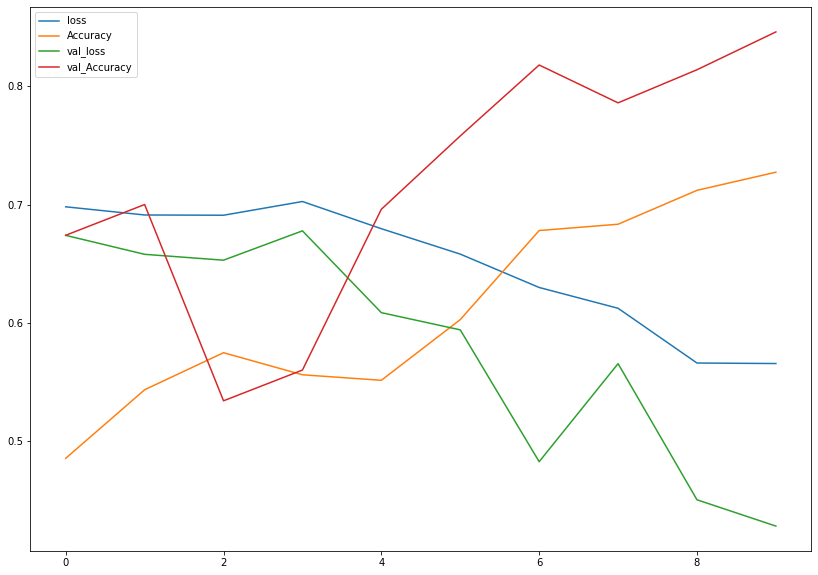

In [59]:
pd.DataFrame(history_6.history).plot(figsize=(14, 10))

### Shuffling data with ImageDataGenerator

Shuffling images is an important step for models to learn patterns in images. By not shuffling images, the model first learns the patterns of one class (pizza) and only when it is finished looking at the first class of images and adjusted the weights accordingly, it will look at the other class (steak).
When the images are shuffled it looks at either class at random and adjusts the weights according to both classes.

Let's shuffle the augmented training data and train another model on it

In [60]:
#  Import the data and augment it from the training directory
print('Shuffled and Augmented training data:')
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

# Create non-augmented training data
print("Shuffled and Non-augmented training data:")
train_data_shuffled = train_datagen.flow_from_directory(train_dir,
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='binary',
                                                        shuffle=True)

print('Non-augmented test data:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Shuffled and Augmented training data:
Found 1500 images belonging to 2 classes.
Shuffled and Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [61]:
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_7.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['Accuracy']
)

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 22s 462ms/step - loss: 0.6741 - Accuracy: 0.5640 - val_loss: 0.5918 - val_Accuracy: 0.7140
Epoch 2/10
47/47 [==============================] - 888s 19s/step - loss: 0.5790 - Accuracy: 0.6947 - val_loss: 0.5072 - val_Accuracy: 0.7280
Epoch 3/10
47/47 [==============================] - 28s 580ms/step - loss: 0.5176 - Accuracy: 0.7467 - val_loss: 0.3993 - val_Accuracy: 0.8320
Epoch 4/10
47/47 [==============================] - 23s 483ms/step - loss: 0.4997 - Accuracy: 0.7607 - val_loss: 0.3708 - val_Accuracy: 0.8420
Epoch 5/10
47/47 [==============================] - 23s 493ms/step - loss: 0.4790 - Accuracy: 0.7820 - val_loss: 0.3466 - val_Accuracy: 0.8420
Epoch 6/10
47/47 [==============================] - 22s 475ms/step - loss: 0.4725 - Accuracy: 0.7753 - val_loss: 0.3899 - val_Accuracy: 0.8180
Epoch 7/10
47/47 [==============================] - 22s 468ms/step - loss: 0.4409 - Accuracy: 0.8053 - val_loss: 0.3233 - val_Accuracy: 0.8620


<AxesSubplot:>

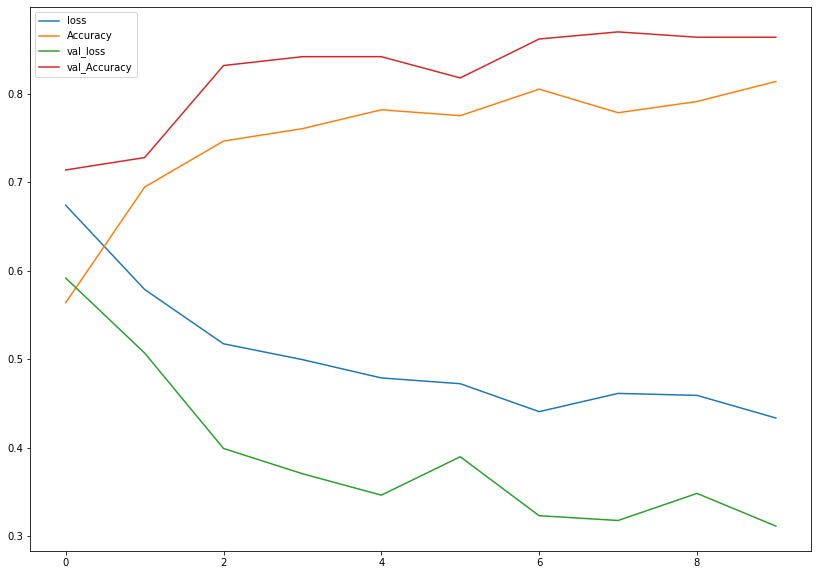

In [62]:
pd.DataFrame(history_7.history).plot(figsize=(14, 10))

## Improving the CNN model

In building CNN models it is common practice to start of with a relatively small number of feature maps, then as it goes deeper, the image sizes decrease (through pooling and possibly non-padding) whilst the number of feature maps increase (i.e. more filters in each convolutional layer).

In order to further improve the model one could add a Dense neural network after flattening the processed cnn-data and add dropout to the neural network.

### General ways of improving the model:

* Increase the number of model layers
* Increase the number of filters in each convolutional layer
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data
* Use **transfer learning** to leverage what another image model has learnt and adjust it for our own use cases

In [63]:
model_8 = Sequential([
    Conv2D(24, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(2),
    Conv2D(48, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_8.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['Accuracy']
)

history_8 = model_8.fit(
    train_data_augmented_shuffled,
    epochs=10,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/10
47/47 [==============================] - 42s 882ms/step - loss: 0.6645 - Accuracy: 0.5860 - val_loss: 0.4985 - val_Accuracy: 0.7420
Epoch 2/10
47/47 [==============================] - 39s 820ms/step - loss: 0.5377 - Accuracy: 0.7387 - val_loss: 0.3934 - val_Accuracy: 0.8320
Epoch 3/10
47/47 [==============================] - 38s 814ms/step - loss: 0.4980 - Accuracy: 0.7693 - val_loss: 0.3989 - val_Accuracy: 0.8080
Epoch 4/10
47/47 [==============================] - 43s 907ms/step - loss: 0.4732 - Accuracy: 0.7860 - val_loss: 0.4201 - val_Accuracy: 0.8080
Epoch 5/10
47/47 [==============================] - 43s 911ms/step - loss: 0.4659 - Accuracy: 0.7833 - val_loss: 0.3079 - val_Accuracy: 0.8700
Epoch 6/10
47/47 [==============================] - 43s 896ms/step - loss: 0.4707 - Accuracy: 0.7893 - val_loss: 0.4134 - val_Accuracy: 0.8280
Epoch 7/10
47/47 [==============================] - 43s 918ms/step - loss: 0.4576 - Accuracy: 0.7880 - val_loss: 0.3005 - val_Accuracy: 0.8840

<AxesSubplot:>

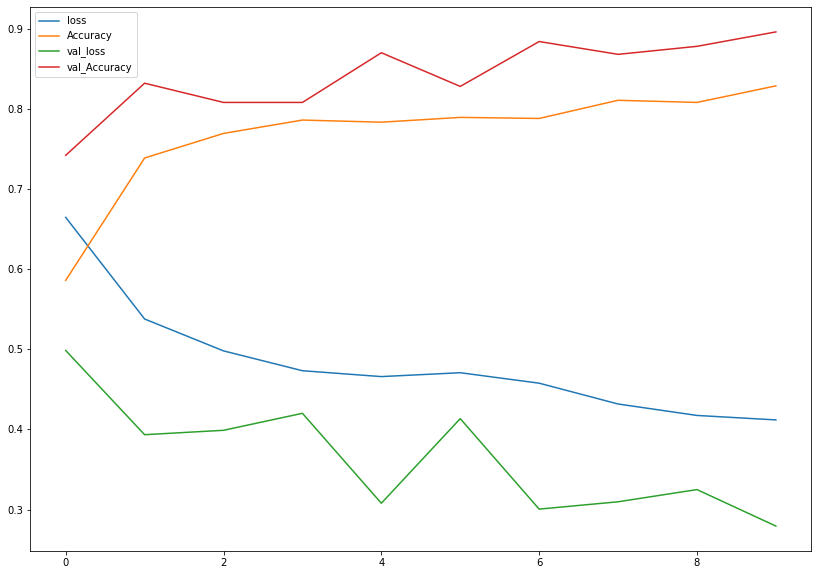

In [64]:
pd.DataFrame(history_8.history).plot(figsize=(14, 10))

The training data improved by 3 percent whereas the validation data reduced its performance by 1 percent. The reason for this could be that the data augmentation that was done earlier is to much and it should be adjusted to make the features more understandable. 

In [65]:
# Create ImageDataGenerator training instances with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.1,
                                             zoom_range=0.1,
                                             width_shift_range=0.1,
                                             height_shift_range=0.1,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation for the test dataset (test data should never be augmented)
test_datagen = ImageDataGenerator(rescale=1/255.)

#  Import the data and augment it from the training directory
print('Shuffled and Augmented training data:')
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

print('Non-augmented test data:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Shuffled and Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [66]:
history_8_1 = model_8.fit(
    train_data_augmented_shuffled,
    epochs=10,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/10
47/47 [==============================] - 39s 827ms/step - loss: 0.3565 - Accuracy: 0.8473 - val_loss: 0.2537 - val_Accuracy: 0.8920
Epoch 2/10
47/47 [==============================] - 38s 809ms/step - loss: 0.3575 - Accuracy: 0.8473 - val_loss: 0.2595 - val_Accuracy: 0.9000
Epoch 3/10
47/47 [==============================] - 40s 847ms/step - loss: 0.3324 - Accuracy: 0.8680 - val_loss: 0.2725 - val_Accuracy: 0.8880
Epoch 4/10
47/47 [==============================] - 41s 865ms/step - loss: 0.3297 - Accuracy: 0.8613 - val_loss: 0.2514 - val_Accuracy: 0.8960
Epoch 5/10
47/47 [==============================] - 39s 836ms/step - loss: 0.3370 - Accuracy: 0.8673 - val_loss: 0.2653 - val_Accuracy: 0.8960
Epoch 6/10
47/47 [==============================] - 40s 853ms/step - loss: 0.3405 - Accuracy: 0.8620 - val_loss: 0.2786 - val_Accuracy: 0.8900
Epoch 7/10
47/47 [==============================] - 38s 813ms/step - loss: 0.3200 - Accuracy: 0.8680 - val_loss: 0.2226 - val_Accuracy: 0.9040

<AxesSubplot:>

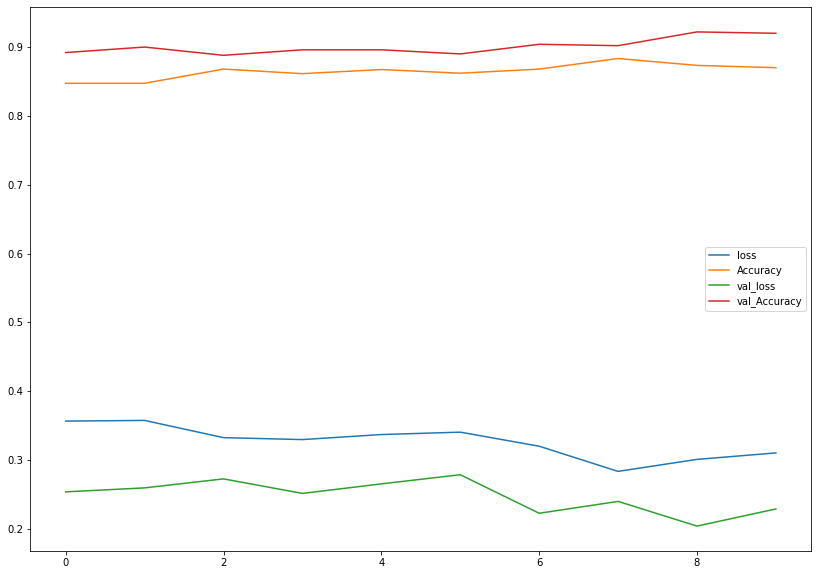

In [67]:
pd.DataFrame(history_8_1.history).plot(figsize=(14, 10))

### Create a function to load and preprocess custom images

In order to test the model on images that is not in the training or testing datasets, we need to create a function to prepare the image(s) so that they can be loaded into our model for further adjustmensts.

In [68]:
def _load_and_prep_image(filename, img_shape=224):

    """
    Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels).
    """

    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image (get all values between 0 and 1)
    img = img / 255.
    return img

In [81]:
beef_path = "C:\\Users\\Joakim Torsvik\\Python_Notebooks\\train_test_data\\TensorFlow_Developer_data\\predict_pizza_steak\\beef_photo.jpg"
pizza_path = "C:\\Users\\Joakim Torsvik\\Python_Notebooks\\train_test_data\\TensorFlow_Developer_data\\predict_pizza_steak\\half-meter-pizza.jpg"
wellington_path = "C:\\Users\\Joakim Torsvik\\Python_Notebooks\\train_test_data\\TensorFlow_Developer_data\\predict_pizza_steak\\beef_wellington.jpg"
calzone_path = "C:\\Users\\Joakim Torsvik\\Python_Notebooks\\train_test_data\\TensorFlow_Developer_data\\predict_pizza_steak\\calzone.jpg"

In [82]:
def pred_and_plot(filename, model=model_8, class_names=class_names):
    
    """
    Imports an image located at filename, makes a prediction
    with the model and plots the image with the predicted class.
    """

    img = _load_and_prep_image(filename)

    plt.imshow(img)
    plt.title('Predicted Image')
    plt.axis(False)
    plt.show()

    pred = model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[int(tf.round(pred))]
    print(f"Predicted class: {pred_class}")
    if pred_class == 'pizza':
        print(f"The prediction probability for pizza was: {1- pred}")
    else:
        print(f"The prediction probability for steak was: {pred}")
    

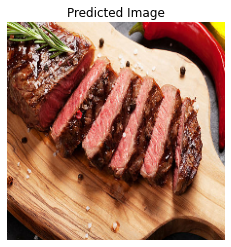

Predicted class: steak
The prediction probability for steak was: [[0.9997045]]


In [83]:
pred_and_plot(beef_path)

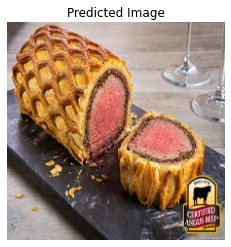

Predicted class: steak
The prediction probability for steak was: [[0.6405517]]


In [84]:
pred_and_plot(wellington_path)

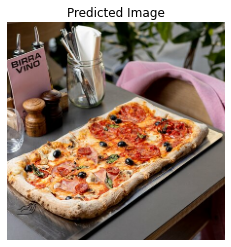

Predicted class: pizza
The prediction probability for pizza was: [[0.967861]]


In [85]:
pred_and_plot(pizza_path)

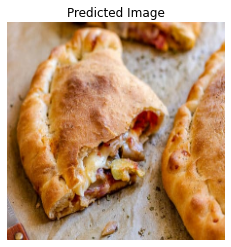

Predicted class: pizza
The prediction probability for pizza was: [[0.90616286]]


In [86]:
pred_and_plot(calzone_path)

## Saving the model

In [87]:
model_8.save("BinaryFoodClassifier")

loaded_model_8 = tf.keras.models.load_model('BinaryFoodClassifier')
loaded_model_8.evaluate(test_data)

INFO:tensorflow:Assets written to: BinaryFoodClassifier\assets
16/16 [==============================] - 3s 183ms/step - loss: 0.2289 - Accuracy: 0.9200


[0.22885581851005554, 0.9200000166893005]

# Multi-Class Image Classification with CNN

In [88]:
# import urllib.request
# import zipfile

# url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip'
# file_name = '10_food_classes_all_data.zip'
# file = urllib.request.urlretrieve(url, file_name)

# zip_ref = zipfile.ZipFile("./10_food_classes_all_data.zip")
# zip_ref.extractall()
# zip_ref.close()

In [89]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [94]:
train_dir = 'C:\\Users\\Joakim Torsvik\\Python_Notebooks\\train_test_data\\TensorFlow_Developer_data\\10_food_classes_all_data\\train\\'
test_dir = 'C:\\Users\\Joakim Torsvik\\Python_Notebooks\\train_test_data\\TensorFlow_Developer_data\\10_food_classes_all_data\\test\\'

In [95]:
data_dir = pathlib.Path(train_dir)
# print(data_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['728020.jpg']
Image Shape: (384, 512, 3)


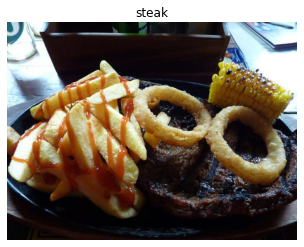

In [96]:
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## Preprocess the data

In [97]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=20,
                                          width_shift_range=0.1,
                                          height_shift_range=0.1,
                                          zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Build the Multi-class model

In [98]:
img_size = (224, 224, 3)

In [99]:
model_9 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=img_size),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_9.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['Accuracy']
)

history_9 = model_9.fit(
    train_data_augmented,
    epochs=10,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps= 0.25 * len(test_data) # Only validating on 25% of the data
)

Epoch 1/10
235/235 [==============================] - 141s 600ms/step - loss: 2.1940 - Accuracy: 0.2000 - val_loss: 2.0743 - val_Accuracy: 0.2469
Epoch 2/10
235/235 [==============================] - 108s 460ms/step - loss: 2.0403 - Accuracy: 0.2692 - val_loss: 2.0567 - val_Accuracy: 0.2500
Epoch 3/10
235/235 [==============================] - 106s 450ms/step - loss: 1.9779 - Accuracy: 0.2984 - val_loss: 1.9584 - val_Accuracy: 0.3172
Epoch 4/10
235/235 [==============================] - 105s 448ms/step - loss: 1.9405 - Accuracy: 0.3196 - val_loss: 1.9351 - val_Accuracy: 0.3063
Epoch 5/10
235/235 [==============================] - 104s 443ms/step - loss: 1.8921 - Accuracy: 0.3415 - val_loss: 1.9279 - val_Accuracy: 0.3281
Epoch 6/10
235/235 [==============================] - 102s 434ms/step - loss: 1.8871 - Accuracy: 0.3396 - val_loss: 1.7985 - val_Accuracy: 0.3703
Epoch 7/10
235/235 [==============================] - 107s 456ms/step - loss: 1.8398 - Accuracy: 0.3629 - val_loss: 1.7582 -

<AxesSubplot:>

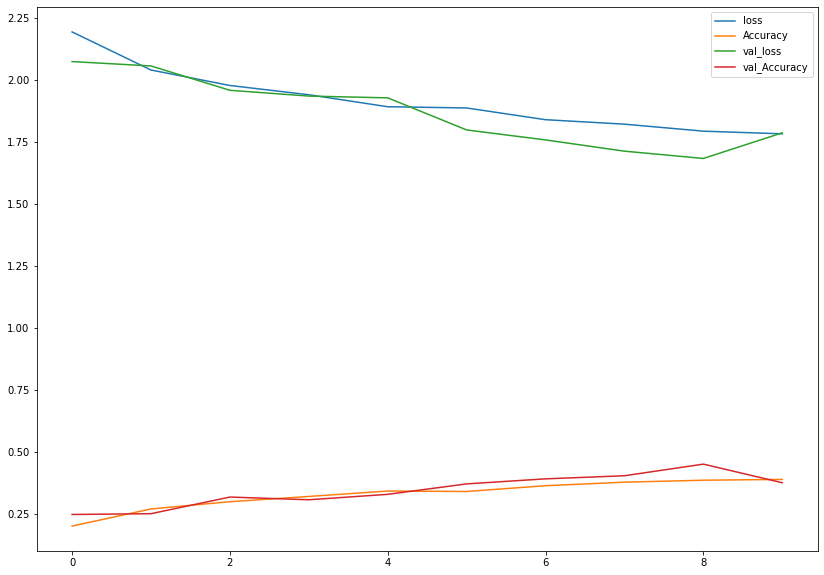

In [100]:
pd.DataFrame(history_9.history).plot(figsize=(14, 10))

## Improving the model

In [101]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=20,
                                          width_shift_range=0.1,
                                          height_shift_range=0.1,
                                          zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [102]:
model_10 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=img_size),
    MaxPool2D(2),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(128, 3, activation='relu'),
    Conv2D(128, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(254, 3, activation='relu'),
    Conv2D(254, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_10.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['Accuracy']
)

history_10 = model_10.fit(
    train_data_augmented,
    epochs=10,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps= 0.25 * len(test_data) # Only validating on 25% of the data
)

Epoch 1/10
235/235 [==============================] - 337s 1s/step - loss: 2.2078 - Accuracy: 0.1736 - val_loss: 2.0938 - val_Accuracy: 0.2313
Epoch 2/10
235/235 [==============================] - 332s 1s/step - loss: 2.0900 - Accuracy: 0.2476 - val_loss: 2.0366 - val_Accuracy: 0.2688
Epoch 3/10
235/235 [==============================] - 330s 1s/step - loss: 2.0143 - Accuracy: 0.2828 - val_loss: 1.9114 - val_Accuracy: 0.3281
Epoch 4/10
235/235 [==============================] - 339s 1s/step - loss: 1.9405 - Accuracy: 0.3151 - val_loss: 1.8219 - val_Accuracy: 0.3578
Epoch 5/10
235/235 [==============================] - 330s 1s/step - loss: 1.8637 - Accuracy: 0.3456 - val_loss: 1.6940 - val_Accuracy: 0.4094
Epoch 6/10
235/235 [==============================] - 329s 1s/step - loss: 1.7986 - Accuracy: 0.3829 - val_loss: 1.6937 - val_Accuracy: 0.4375
Epoch 7/10
235/235 [==============================] - 328s 1s/step - loss: 1.7249 - Accuracy: 0.4116 - val_loss: 1.6727 - val_Accuracy: 0.4141

<AxesSubplot:>

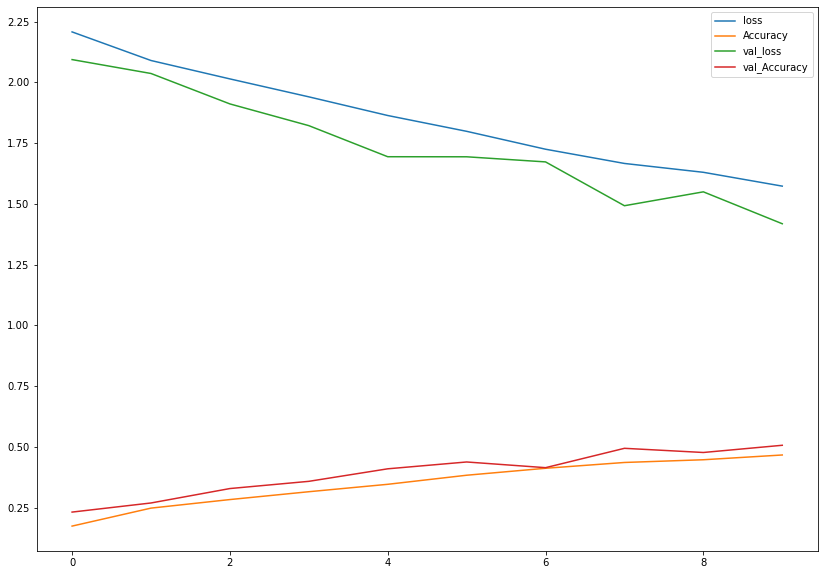

In [103]:
pd.DataFrame(history_10.history).plot(figsize=(14, 10))

In [104]:
def pred_and_plot(filepath, model=model_10, class_names=class_names):

    """
    Imports an image located at filepath, makes a prediction
    with the model and plots the image with the predicted class.
    """

    # Import the target image and preprocess it
    img = _load_and_prep_image(filepath)

    # Predict the image and get the class label
    pred = model.predict(tf.expand_dims(img, axis=0))
    pred = pred[0]

    if len(pred) > 1:
        pred_class = class_names[tf.argmax(pred)]
    else:
        pred_class = class_names[int(tf.round(pred))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title("Prediction Image")
    plt.axis(False);

    print(f"The predicted class is: {pred_class}")
    print(f"The prediction probability of the class is: {pred[tf.argmax(pred)]}")

The predicted class is: pizza
The prediction probability of the class is: 0.46996283531188965


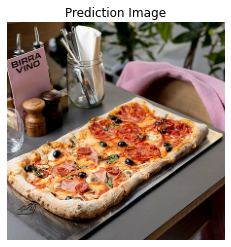

In [105]:
pred_and_plot(pizza_path)

The predicted class is: fried_rice
The prediction probability of the class is: 0.4244024157524109


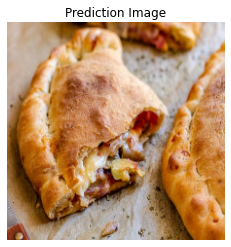

In [106]:
pred_and_plot(calzone_path)

The predicted class is: steak
The prediction probability of the class is: 0.5332251787185669


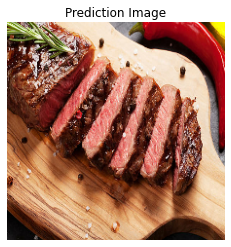

In [107]:
pred_and_plot(beef_path)

The predicted class is: grilled_salmon
The prediction probability of the class is: 0.22069710493087769


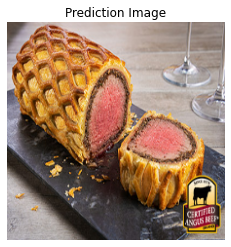

In [108]:
pred_and_plot(wellington_path)

The model still doesn't preform very well, but it did improve a lot. Seeing as increasing the number of layers and convolutional filters helped increase the model performance, an even larger model could increase the performance up to an acceptable accuracy (e.g. +90% accuracy).

In [109]:
model_10 = Sequential([
    Conv2D(filters=64, # 1
           kernel_size=4,
           strides=(4, 4),
           padding='same',
           activation='relu', 
           input_shape=img_size),
    MaxPool2D(pool_size=2, # 2
              strides=(2, 2)),
    Conv2D(filters=254,  # 3
           kernel_size=3,
           activation='relu'),
    MaxPool2D(pool_size=2, # 4
              strides=(1, 1)),
    Conv2D(filters=254, # 5
           kernel_size=2,
           activation='relu'),
    Conv2D(filters=254, # 6
           kernel_size=2,
           activation='relu'),
    MaxPool2D(pool_size=2), # 7
    Flatten(),
    Dense(10, activation='softmax')
])

model_10.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

history_10 = model_10.fit(
    train_data_augmented,
    epochs=10,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps= 0.25 * len(test_data) # Only validating on 25% of the data
)

Epoch 1/10
235/235 [==============================] - 135s 571ms/step - loss: 2.1766 - accuracy: 0.1948 - val_loss: 2.0462 - val_accuracy: 0.2609
Epoch 2/10
235/235 [==============================] - 134s 569ms/step - loss: 2.0336 - accuracy: 0.2760 - val_loss: 1.9411 - val_accuracy: 0.3281
Epoch 3/10
235/235 [==============================] - 136s 581ms/step - loss: 1.9507 - accuracy: 0.3185 - val_loss: 1.9047 - val_accuracy: 0.3281
Epoch 4/10
235/235 [==============================] - 137s 581ms/step - loss: 1.8635 - accuracy: 0.3529 - val_loss: 1.7133 - val_accuracy: 0.3750
Epoch 5/10
235/235 [==============================] - 26879s 115s/step - loss: 1.7919 - accuracy: 0.3811 - val_loss: 1.7597 - val_accuracy: 0.3781
Epoch 6/10
235/235 [==============================] - 139s 591ms/step - loss: 1.7304 - accuracy: 0.4028 - val_loss: 1.6521 - val_accuracy: 0.4578
Epoch 7/10
235/235 [==============================] - 141s 599ms/step - loss: 1.6632 - accuracy: 0.4324 - val_loss: 1.6457 

In [110]:
model_10.evaluate(test_data)

79/79 [==============================] - 12s 153ms/step - loss: 1.4227 - accuracy: 0.5328


[1.4227133989334106, 0.532800018787384]

The model has regressed in terms of accuracy by about 3%, but the run-time of each epoch is almost halved.

# Saving the model

In [111]:
model_10.save("MultiClass_FoodClassifier")

INFO:tensorflow:Assets written to: MultiClass_FoodClassifier\assets


In [112]:
loaded_model_10 = tf.keras.models.load_model('MultiClass_FoodClassifier')
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 12s 148ms/step - loss: 1.4227 - accuracy: 0.5328


[1.422713041305542, 0.532800018787384]

In [113]:
def calculate_conv_output(input_size, filter_size, stride, padding):
    # Unpack the input size
    input_height, input_width = input_size

    # Unpack the filter size
    filter_height, filter_width = filter_size

    # Calculate the output height and width
    output_height = ((input_height - filter_height + 2 * padding) // stride) + 1
    output_width = ((input_width - filter_width + 2 * padding) // stride) + 1

    return (output_height, output_width)

def calculate_pooling_output(input_size, pool_size, stride):
    # Unpack the input size
    input_height, input_width = input_size

    # Unpack the pool size
    pool_height, pool_width = pool_size

    # Calculate the output height and width
    output_height = (input_height - pool_height) // stride + 1
    output_width = (input_width - pool_width) // stride + 1

    return (output_height, output_width)

def calculate_conv_pool_output(input_size, conv_params, pool_params):
    """
    Calculate the output shapes of convolutional and pooling layers in a CNN.

    Args:
    - input_size: A tuple (input_height, input_width) representing the input size.
    - conv_params: A list of tuples (filter_size, stride, padding) for each convolutional layer.
    - pool_params: A list of tuples (pool_size, stride) for each pooling layer.

    Returns:
    - A list of tuples (output_height, output_width) representing the output shape at each layer.
    """
    output_shapes = []
    current_input_size = input_size

    print(f"Input Shape: {input_size} ")
    
    for conv_param in conv_params:
        filter_size, stride, padding = conv_param
        kernel = (filter_size, filter_size)
        output_size = calculate_conv_output(current_input_size, kernel, stride, padding)
        output_shapes.append(output_size)
        current_input_size = output_size

    for pool_param in pool_params:
        pool_size, stride = pool_param
        pool_kernel = (pool_size, pool_size)
        output_size = calculate_pooling_output(current_input_size, pool_kernel, stride)
        output_shapes.append(output_size)
        current_input_size = output_size

    return output_shapes

In [114]:
# 1 layer - Conv:
input_size = (224, 224)
filter_size = (4, 4)
stride = 2
padding = 1  # Use 0 for 'valid' padding, 1 for 'same' padding

output_size = calculate_conv_output(input_size, filter_size, stride, padding)
print("Output Size:", output_size)

Output Size: (112, 112)


In [115]:
# 2 layer - Pool:
input_size = (112, 112)
pool_size = (2, 2)
stride = 2

output_size = calculate_pooling_output(input_size, pool_size, stride)
print("Output Size:", output_size)

Output Size: (56, 56)


In [116]:
# 3 layer - Conv
input_size = (56, 56)
filter_size = (3, 3)
stride = 1
padding = 0  # Use 0 for 'valid' padding, 1 for 'same' padding

output_size = calculate_conv_output(input_size, filter_size, stride, padding)
print("Output Size:", output_size)

Output Size: (54, 54)


In [117]:
# 4 layer - Pool
input_size = (54, 54)
pool_size = (2, 2)
stride = 1

output_size = calculate_pooling_output(input_size, pool_size, stride)
print("Output Size:", output_size)

Output Size: (53, 53)


In [118]:
# 5 layer - Conv
input_size = (53, 53)
filter_size = (4, 4)
stride = 1
padding = 1  # Use 0 for 'valid' padding, 1 for 'same' padding

output_size = calculate_conv_output(input_size, filter_size, stride, padding)
print("Output Size:", output_size)

Output Size: (52, 52)
